# IMPORT

In [1]:
import torch
from torchvision import transforms
from torch.utils.data import TensorDataset,DataLoader
import torch.nn as nn
#import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

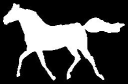

In [2]:
I = Image.open("C:/Users/sraba/OneDrive/Documents/ML_Barbu/Datasets/horse001b.png")
I

In [3]:
Convertor = transforms.ToTensor()
I_tensor = Convertor(I)
I_tensor.shape

torch.Size([1, 84, 128])

In [4]:
Input = []
for i in range(0,84):
    for j in range(0,128):
        var = torch.tensor([i,j])
        Input.append(var)
Input = torch.stack(Input)
Input = Input.reshape(10752,2)

In [5]:
#Normalize Input
Input = torch.tensor(Input).float()
mInput = torch.mean(Input,0)
sInput = torch.std(Input,0)
Input = (Input-mInput)/sInput

C:\Users\sraba\AppData\Local\Temp/ipykernel_13776/993865593.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Input = torch.tensor(Input).float()


In [6]:
#Output manipulation
I_tensor = I_tensor.reshape(10752,1)
mI_tensor=torch.mean(I_tensor)
I_tensor = I_tensor - mI_tensor
I_tensor = torch.tensor(I_tensor).float()

C:\Users\sraba\AppData\Local\Temp/ipykernel_13776/1144567337.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  I_tensor = torch.tensor(I_tensor).float()


In [7]:
#Visualize normalized image
I_test = I_tensor.reshape(1,84,128)

In [8]:
Reverse_Convertor = transforms.ToPILImage()
ImageTest = Reverse_Convertor(I_test)
ImageTest.show()

In [9]:
print(I_tensor.shape)
print(Input.shape)

torch.Size([10752, 1])
torch.Size([10752, 2])


# SETTING UP X AND Y (input & output)

In [10]:
x = Input.clone()
y = I_tensor.clone()

In [11]:
print(x.shape)
print(y.shape)

torch.Size([10752, 2])
torch.Size([10752, 1])


In [12]:
TD=TensorDataset(x,y)
train_loader=DataLoader(TD,batch_size=64, shuffle=True)

# DEFINING HYPERPARAMETERS

In [13]:
n_in = 2
n_h1 = 32
n_h2 = 64
n_h3 = 128
n_h4 = 128
n_out = 1
L_Rate = 0.003
epoch = 300
#batch size as already defined in the DataLoader = 64

# THE NEURAL NETWORK CLASS AS A SUBCLASS OF TORCH.NN

In [14]:
class NeuralNet(nn.Module):
    def __init__(self, n_in, n_h1, n_h2, n_h3, n_h4, n_out):
        super(NeuralNet, self).__init__()
#        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(nn.Linear(n_in,n_h1), nn.ReLU(), nn.Linear(n_h1,n_h2), nn.ReLU(),
                                               nn.Linear(n_h2,n_h3), nn.ReLU(), nn.Linear(n_h3,n_h4), nn.ReLU(),
                                               nn.Linear(n_h4,n_out))

        
    def forward(self, x):
#        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        return x  

model = NeuralNet(n_in, n_h1, n_h2, n_h3, n_h4, n_out)
print(model)

NeuralNet(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=1, bias=True)
  )
)


# Training

In [15]:
losses=[]
optimizer = optim.Adam(model.parameters(), lr=L_Rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)
for epoch in range(epoch):
    losstemp=0
    for data in train_loader:
        inputs,target=data
        optimizer.zero_grad()   # zero the gradient buffers
        outputs = model(inputs)
        loss=torch.mean((target - outputs)**2)
        losstemp+=loss.item()
        loss.backward()
        optimizer.step()
    scheduler.step()
    losses.append(losstemp)

In [16]:
losses = [x / 168 for x in losses]
len(losses)

300

In [17]:
#losses

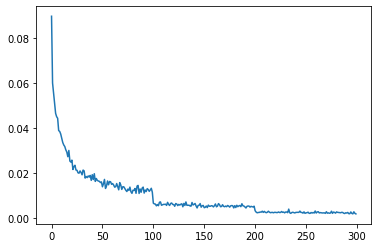

In [18]:
plt.plot(losses)

# Prediction and image reconstruction

In [19]:
y_pred = model(x).reshape(1,84,128)

In [20]:
y_pred[y_pred>1] = 1

In [21]:
y_pred[y_pred<0] = 0

In [22]:
#Reverse_Convertor = transforms.ToPILImage()
Image = Reverse_Convertor(y_pred)
Image.show()